#**1.0 Mount to your Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.1 Import relevant modules and packages**

In [44]:
import numpy as np
import os
import math
from PIL import Image
import astropy
%config InlineBackend.rc = {}
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from matplotlib.colors import LogNorm
from astropy.nddata.utils import Cutout2D
from skimage import data, feature
from skimage.color import rgb2gray
from skimage.feature import blob_log

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# **2.0 Define the relevant functions**

In [47]:
def image_load(name,drive_location):
  '''function to load image from your google drive'''

  image_path = f'/content/drive/My Drive/{drive_location}/{name}.fit'
  hdulist = fits.open(image_path)
  image_data = hdulist[0].data
  return image_data



def plot_image(image_data):
  '''function to plot image'''

  plt.figure()
  plt.imshow(image_data, cmap='gray', norm =LogNorm(), origin = 'lower') #LogNorm increases visibility, origin flips image which would otherwise be upside down
  plt.colorbar()



def zoomed_image_plot(image_data, size):
  '''
  function to detect and zoom in on single star 
  size = cutout size, should be formatted as (n,m)
  '''

  #identify the brightest pixel (assumes this is roughly the centre of the star)
  result = np.where(image_data == np.amax(image_data))
  #convert this into a position
  position = list(zip(result[1], result[0]))[0]
  #cut out this region (size = size, position = position)
  cutout = Cutout2D(image_data, position, size)  #make sure you have imported Cutout2D from astropy.nddata.utils
  plt.imshow(cutout.data, origin='lower', cmap='gray')
  plt.colorbar()



def star_detector(image_data, min_sigma=1, max_sigma=150, num_sigma=10, threshold=0.01, overlap=0.5, log_scale=True): 
  '''function to detect stars using blob_log
  increase max sigma to detect bigger stars, 
  reduce threshold to detect less bright stars
  '''

  greyimg = rgb2gray(image_data) #only necessary for non-greyscale images 
  stars = blob_log(greyimg, min_sigma, max_sigma, num_sigma, threshold, overlap, log_scale)
  return stars



def star_plotter(image_data, stars):
  '''function to plot image and circle detected stars'''

  fig, ax = plt.subplots(figsize=(10,10))
  ax.imshow(image_data, cmap = 'gray', norm = LogNorm(), origin = 'lower')
  for star in stars:
    y, x, area = star
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', linewidth = 3, fill=False))

# **3.0 Sample for one star**

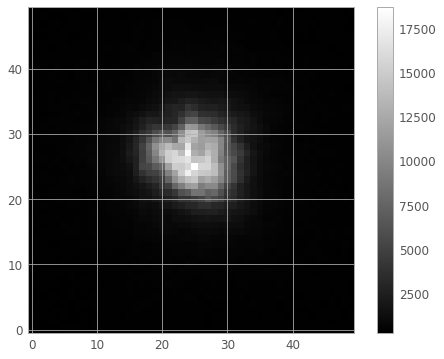

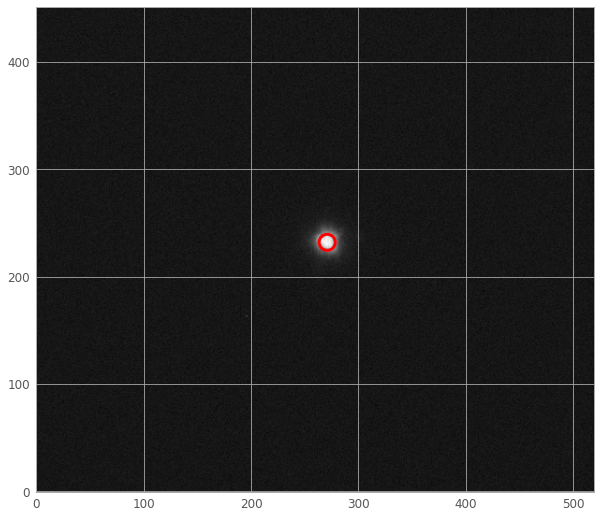

In [45]:
image_data = image_load('rigel_12564', '3YP/observations1')
#plot_image(image_data)
zoomed_image_plot(image_data, (50,50))
stars = star_detector(image_data)
star_plotter(image_data, stars)

# **3.1 Sample for multiple stars**

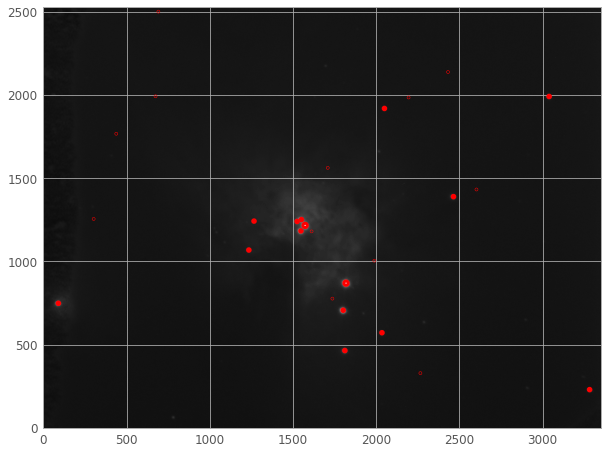

In [48]:
image_data = image_load('m42_12451', '3YP/observations1')
stars = star_detector(image_data)
star_plotter(image_data, stars)

# **4.0 Useful resoures and packages:** 
*   https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_log
